### SVM Kernels 

The nullspace, also known as the kernel, of a matrix x is the set of vectors that produce a zero vector when multiplied by x. It is not relevant to finding optimal weights for a linear parameter model, as it only represents weight combinations that would result in a zero prediction. The main goal is to determine the best weights that minimize the difference between the predicted and actual outputs, which can be achieved through the least squares regression method. This method provides a closed-form solution for w using the equation w = (X^T X)^-1 X^T y, where ^T indicates matrix transpose and ^-1 denotes matrix inverse. Adding a regularization term can help represent the weights as a linear combination of the data points.

The radial basis function (RBF) is a common technique used in machine learning and pattern recognition to map input data points to a higher dimension where linear methods can be used to separate them. RBF is infinite-dimensional and based on Mercer's theorem. The second part of the equation represents the kernel representation of the RBF kernel, and phi denotes the feature map that maps the input data points. However, computing the inner product between the feature vectors of all pairs of data points can be computationally expensive, especially for large datasets.

For the linear kernel: $Φ(x) = x$

For the quadratic kernel $Φ(x) = [x^2, y^2, x, y]^T$

In [4]:
#Kernel SVM
import matplotlib.pyplot as plt
import pandas as pd
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRyC30MY4Wo7epIBrLQvpaW-NZxWHT4n9tSFMj30sow7p05cvj4P38AztI-wwxdmmeJDrEZXhVc1CGL/pub?gid=1319913151&single=true&output=csv"
bankdata = pd.read_csv(url)
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[136   3]
 [  3 133]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       139
           1       0.98      0.98      0.98       136

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [2]:
linear_classifier = SVC(kernel='linear')
quadratic_classifier = SVC(kernel='poly', degree=2)
rbf_classifier = SVC(kernel='rbf', gamma=1)
linear_classifier.fit(X_train, y_train)
quadratic_classifier.fit(X_train, y_train)
rbf_classifier.fit(X_train, y_train)
y_pred_linear = linear_classifier.predict(X_test)
y_pred_quadratic = quadratic_classifier.predict(X_test)
y_pred_rbf = rbf_classifier.predict(X_test)

Linear classifier
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       139
           1       0.51      0.43      0.47       136

    accuracy                           0.52       275
   macro avg       0.52      0.52      0.51       275
weighted avg       0.52      0.52      0.51       275

Quadratic classifier
              precision    recall  f1-score   support

           0       0.52      0.58      0.54       139
           1       0.51      0.45      0.48       136

    accuracy                           0.51       275
   macro avg       0.51      0.51      0.51       275
weighted avg       0.51      0.51      0.51       275

RBF classifier
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       139
           1       0.51      0.44      0.47       136

    accuracy                           0.52       275
   macro avg       0.52      0.52      0.51       275
weighted avg       0

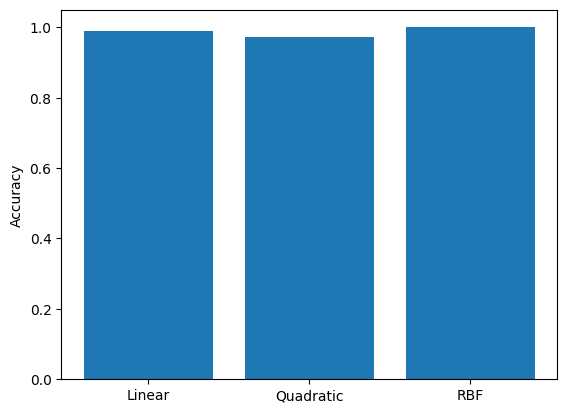

Linear classifier average:  0.9883397478433974
Quadratic classifier average:  0.972307896483079
RBF classifier average:  1.0


In [6]:
import numpy as np
#bonus code cell
print("Linear classifier")
print(classification_report(y_test,y_pred_linear))
print("Quadratic classifier")
print(classification_report(y_test,y_pred_quadratic))
print("RBF classifier")
print(classification_report(y_test,y_pred_rbf))

# using cross-validation
from sklearn.model_selection import cross_val_score
scores_linear = cross_val_score(linear_classifier, X, y, cv = 5)
scores_quadratic = cross_val_score(quadratic_classifier, X, y, cv = 5)
scores_rbf = cross_val_score(rbf_classifier, X, y, cv = 5)

# plotting the mean of each classifier
plt.bar(['Linear', 'Quadratic', 'RBF'], [np.mean(scores_linear), np.mean(scores_quadratic), np.mean(scores_rbf)])
plt.ylabel('Accuracy')
plt.show()

print('Linear classifier average: ', np.mean(scores_linear))
print('Quadratic classifier average: ', np.mean(scores_quadratic)) 
print('RBF classifier average: ', np.mean(scores_rbf))